In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from sklearn.metrics import confusion_matrix
import math

In [3]:
def charger_images(base_path, test_size=0.2):
    images = []
    labels = []
    
    for digit in range(10):  
        digit_folder = os.path.join(base_path, str(digit))  
        for i in range(101):  
            image_path = os.path.join(digit_folder, f"{i}.jpg")
            if os.path.exists(image_path):
                with Image.open(image_path) as img:
                    img_array = np.asarray(img)
                    img_array = img_array / 255.0  
                    images.append(img_array)  
                    labels.append(digit)  
    
    images = np.array(images)
    labels = np.array(labels)

    indices = np.arange(images.shape[0])
    np.random.shuffle(indices)
    images = images[indices]
    labels = labels[indices]
    
    split_idx = int(images.shape[0] * (1 - test_size))
    X_train, X_test = images[:split_idx], images[split_idx:]
    y_train, y_test = labels[:split_idx], labels[split_idx:]
    
    return X_train, X_test, y_train, y_test

chemin_dataset = "chiffres/"

# Charger les images
X_train, X_test, y_train, y_test = charger_images(chemin_dataset, test_size=0.2)

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [4]:
# Génération d'images aléatoires
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'
)

In [5]:
# Création du modèle
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(10, 10, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(80, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

c:\Users\jehan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
# Compilation du modèle
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [7]:
# Entraînement du modèle
history = model.fit(datagen.flow(X_train, y_train, batch_size=100),
                    steps_per_epoch=math.ceil(len(X_train) / 100), epochs=400, validation_data=(X_test, y_test))


Epoch 1/400


c:\Users\jehan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.1272 - loss: 2.2978 - val_accuracy: 0.1337 - val_loss: 2.2637
Epoch 2/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1337 - val_loss: 2.2637
Epoch 3/400


c:\Users\jehan\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1698 - loss: 2.2779 - val_accuracy: 0.2673 - val_loss: 2.2315
Epoch 4/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2673 - val_loss: 2.2315
Epoch 5/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2323 - loss: 2.2445 - val_accuracy: 0.3465 - val_loss: 2.1489
Epoch 6/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3465 - val_loss: 2.1489
Epoch 7/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2494 - loss: 2.1990 - val_accuracy: 0.3416 - val_loss: 2.0248
Epoch 8/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3416 - val_loss: 2.0248
Epoch 9/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2699 - loss: 2.1145 - val_accuracy: 0.4455 - val_loss: 1.8174
Epoch 10/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0

In [8]:
# Calcul précision
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nPrécision sur l\'ensemble de test:', test_acc * 100, '%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9665 - loss: 0.2241 

Précision sur l'ensemble de test: 97.02970385551453 %


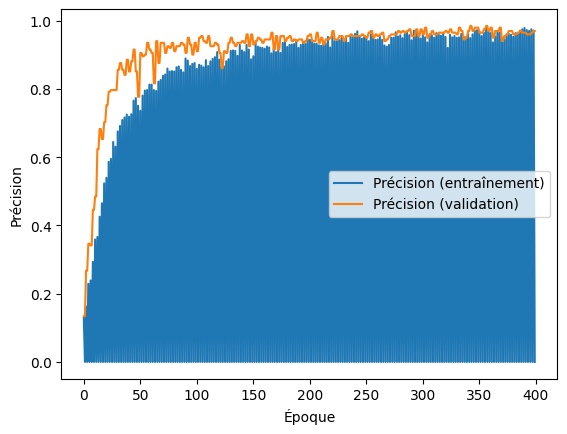

In [9]:
# Précisions entraînement et tests
plt.plot(history.history['accuracy'], label='Précision (entraînement)')
plt.plot(history.history['val_accuracy'], label='Précision (validation)')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.show()

In [10]:
# Précision pour chaque chiffre
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for chiffre in range(10):
    indices = y_test == chiffre
    correct_predictions = np.sum(predicted_labels[indices] == y_test[indices])
    total_examples = np.sum(indices)
    precision_chiffre = correct_predictions / total_examples if total_examples > 0 else 0.0
    print(f'Précision pour le chiffre {chiffre}: {precision_chiffre * 100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Précision pour le chiffre 0: 100.00%
Précision pour le chiffre 1: 100.00%
Précision pour le chiffre 2: 100.00%
Précision pour le chiffre 3: 80.00%
Précision pour le chiffre 4: 100.00%
Précision pour le chiffre 5: 100.00%
Précision pour le chiffre 6: 95.65%
Précision pour le chiffre 7: 100.00%
Précision pour le chiffre 8: 100.00%
Précision pour le chiffre 9: 90.91%


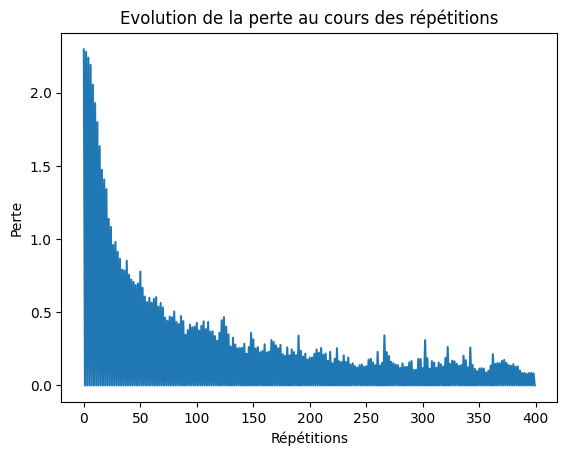

In [11]:
loss_history = history.history['loss']

# Tracer l'évolution de la perte
plt.plot(loss_history)
plt.title('Evolution de la perte au cours des répétitions')
plt.xlabel('Répétitions')
plt.ylabel('Perte')
plt.show()

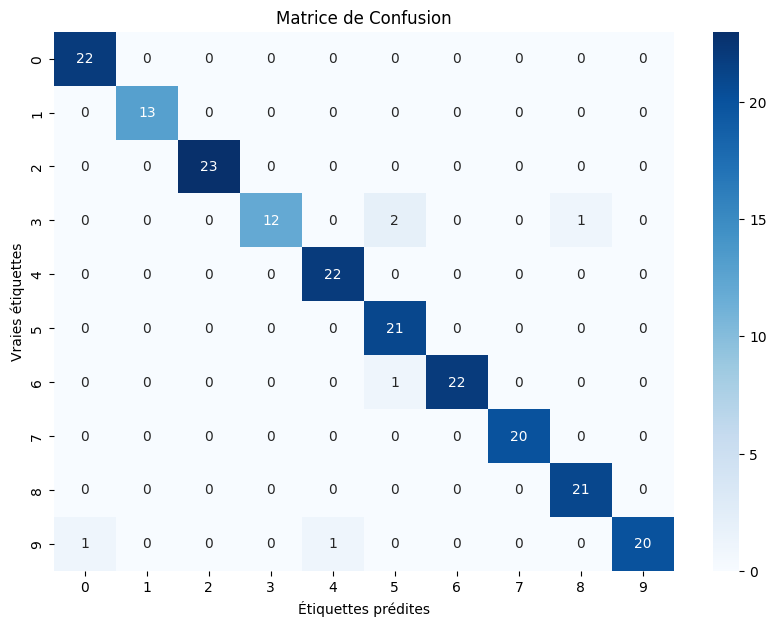

In [12]:
# Matrice de confusion
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title('Matrice de Confusion')
    plt.ylabel('Vraies étiquettes')
    plt.xlabel('Étiquettes prédites')
    plt.show()

plot_confusion_matrix(y_test, predicted_labels, classes=[str(i) for i in range(10)])


In [13]:
#prédire avec de nouvelles images
def predict_digit(image_path, model):
    # Charger l'image
    img = Image.open(image_path)
    img = img.convert("L")  # Convertir en niveaux de gris
    img = img.resize((10, 10))  # Redimensionner l'image à la taille attendue
    img_array = np.asarray(img)  # Convertir l'image en tableau numpy
    img_array = img_array / 255.0  # Normaliser les valeurs de pixel

    # Ajouter une dimension pour correspondre à la forme attendue (batch_size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = np.expand_dims(img_array, axis=-1)

    # Faire une prédiction avec le modèle
    prediction = model.predict(img_array)
    res = np.arange(10)
    res = np.hstack((res.reshape(-1,1), prediction.reshape(-1,1)))

    return res



In [14]:
# Affichage barplot pour les valeurs prédites
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def afficher_tableau_avec_couleur(tableau):
    # Extraire les chiffres et les valeurs
    chiffres = tableau[:, 0].astype(int)
    valeurs = tableau[:, 1].astype(float)

    # Trouver la valeur maximale
    valeur_max = np.max(valeurs)

    # Créer une palette de couleurs en utilisant seaborn
    couleur_palette = sns.color_palette("coolwarm", len(valeurs))

    # Créer un sous-tracé pour le tableau
    fig, ax = plt.subplots(figsize=(8, 4))

    # Afficher le tableau avec chaque chiffre coloré en fonction de sa valeur
    bars = plt.bar(chiffres, valeurs, color=couleur_palette)

    # Colorer le chiffre avec la valeur maximale en rouge
    bars[np.argmax(valeurs)].set_color('red')

    # Ajouter des titres et des étiquettes
    plt.xlabel('Chiffre')
    plt.ylabel('Valeur')
    plt.title('Tableau avec couleur')
    plt.xticks(chiffres)

    # Afficher le tableau
    plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


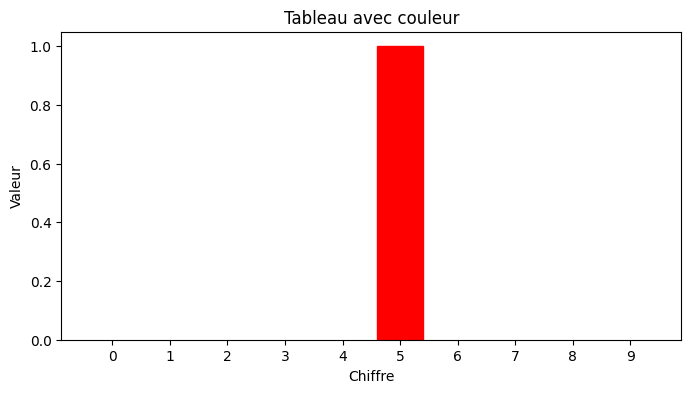

None


In [18]:
predicted_digit = predict_digit("chiffres_test/5_g.png", model)
print(afficher_tableau_avec_couleur(predicted_digit))